In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
from collections import Counter

In [2]:
results_path = "./models/Reinforce_One_Dataset/"
datasets = list(map(os.path.basename, glob.glob(r"OneDatasetLearning/Classification/*")))

In [93]:
cv = ['train', 'test']

glob.glob(results_path + "*")
all_results = [(pd.read_csv(x, index_col=0), os.path.basename(x)) for x in glob.glob(results_path + "*")]

for curr_result_df, name in all_results:
    curr_result_df['delta_param'] = curr_result_df['origin_param'] / curr_result_df['new_param']
    curr_result_df['delta_acc'] = curr_result_df['new_acc'] - curr_result_df['origin_acc']

In [4]:
len(all_results)

543

In [94]:
relevant_results = list(filter(lambda x: 'with_loop' in x[1] and 'Random_Actions' not in x[1], all_results))

In [6]:
all_features = []
all_sizes = []

for curr_d in datasets:
    s, f = pd.read_csv(f'OneDatasetLearning/Classification/{curr_d}/{curr_d}.csv').shape
    all_sizes.append(s)
    all_features.append(f)


In [7]:
dataset_to_feature_size = dict([(x, all_features[idx]) for idx, x in enumerate(datasets)])
dataset_to_size = dict([(x, all_sizes[idx]) for idx, x in enumerate(datasets)])

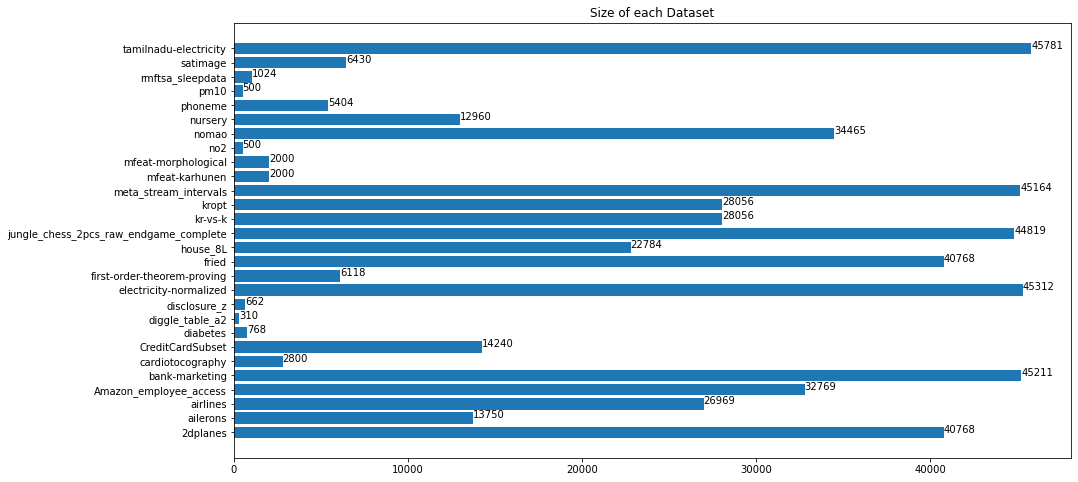

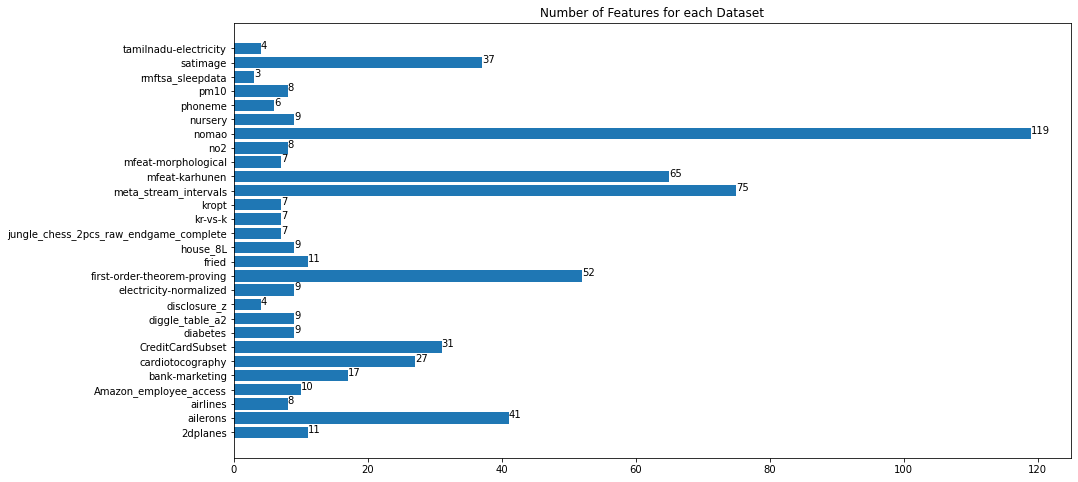

In [8]:
from matplotlib.pyplot import figure

figure(figsize = (15,8))
plt.barh(datasets, all_sizes)
plt.title("Size of each Dataset")
for index, value in enumerate(all_sizes):
    plt.text(value, index, str(value))
plt.show()

figure(figsize = (15,8))
plt.barh(datasets, all_features)
for index, value in enumerate(all_features):
    plt.text(value, index, str(value))
plt.title("Number of Features for each Dataset")
plt.show()

In [95]:
train_relevant_results = list(filter(lambda x: '_train' in x[1], relevant_results))

In [96]:
test_relevant_results = list(filter(lambda x: '_test' in x[1], relevant_results))

In [97]:
all_hyper_params_possibilities = ['1', '5', '50']
train_relevant_results_by_acc = {}

for curr_acc_hp in all_hyper_params_possibilities:    
    curr_group = list(filter(lambda x: re.search(r'acc_reduction_(\d{1,2})', x[1]).group(1) == curr_acc_hp, 
                             train_relevant_results))
    train_relevant_results_by_acc[curr_acc_hp] = curr_group

In [104]:
for curr_acc_hp in all_hyper_params_possibilities:
    curr_group = train_relevant_results_by_acc[curr_acc_hp]
    a = pd.concat(list(map(lambda x: x[0], curr_group)))
    

,model,new_acc,origin_acc,new_param,origin_param,new_model_arch,origin_model_arch,delta_param,delta_acc
0,./OneDatasetLearning/Classification/2dplanes/n...,0.927643,0.934143,1179,2622,"[(10, 89), (89, 2)]","[(10, 200), (200, 2)]",2.223919,-0.006500
1,./OneDatasetLearning/Classification/2dplanes/n...,0.934633,0.942605,587,1302,"[(10, 45), (45, 2)]","[(10, 100), (100, 2)]",2.218058,-0.007972
2,./OneDatasetLearning/Classification/2dplanes/n...,0.932058,0.942727,1718,3902,"[(10, 132), (132, 2)]","[(10, 300), (300, 2)]",2.271246,-0.010670
3,./OneDatasetLearning/Classification/2dplanes/n...,0.932303,0.932426,121502,326122,"[(10, 179), (179, 237), (237, 60), (60, 237), ...","[(10, 300), (300, 400), (400, 100), (100, 400)...",2.684088,-0.000123
4,./OneDatasetLearning/Classification/2dplanes/n...,0.926662,0.900294,15980,52802,"[(10, 54), (54, 268), (268, 2)]","[(10, 100), (100, 500), (500, 2)]",3.304255,0.026367
...,...,...,...,...,...,...,...,...,...
19,./OneDatasetLearning/Classification/tamilnadu-...,0.307197,0.307197,216520,216520,"[(3, 500), (500, 300), (300, 200), (200, 20)]","[(3, 500), (500, 300), (300, 200), (200, 20)]",1.000000,0.000000
20,./OneDatasetLearning/Classification/tamilnadu-...,0.306978,0.306978,7220,7220,"[(3, 300), (300, 20)]","[(3, 300), (300, 20)]",1.000000,0.000000
21,./OneDatasetLearning/Classification/tamilnadu-...,0.785301,0.785301,372620,372620,"[(3, 500), (500, 400), (400, 400), (400, 20)]","[(3, 500), (500, 400), (400, 400), (400, 20)]",1.000000,0.000000
22,./OneDatasetLearning/Classification/tamilnadu-...,0.130829,0.130829,112620,112620,"[(3, 500), (500, 100), (100, 500), (500, 20)]","[(3, 500), (500, 100), (100, 500), (500, 20)]",1.000000,0.000000


In [15]:
results_by_dataset = {}

for curr_d in datasets:
    curr_dataset_results = list(filter(lambda x : curr_d in x[1], relevant_results))
    results_by_dataset[curr_d] = {}
    
    for curr_cv in cv:
        curr_dataset_cv_results = list(filter(lambda x: curr_cv in x[1], curr_dataset_results))
        results_by_dataset[curr_d][curr_cv] = {}
        
        curr_dataset_cv_results_combined = list(filter(lambda x :  'Combined' in x[1], curr_dataset_cv_results))
        curr_dataset_cv_results_not_combined = list(filter(lambda x :  'Combined' not in x[1], curr_dataset_cv_results))
        
        results_by_dataset[curr_d][curr_cv][True] = curr_dataset_cv_results_combined
        results_by_dataset[curr_d][curr_cv][False] = curr_dataset_cv_results_not_combined

In [16]:
def plot_acc_to_param(df, name, ax):
    accs = df['delta_acc']
    params = df['delta_param']
    ax.scatter(accs, params, label = name, alpha=0.5)
    pass

In [17]:
def plot_results_by_cv(curr_cv):
    print(f"Current CV -> {curr_cv}")
    print("---------------------------------------------------\n")

    for curr_d in datasets:
    #     print(f"Current Dataset : '{curr_d}'")
        fig, ax = plt.subplots()
        fig.set_figheight(10)
        fig.set_figwidth(10)
        ax.title.set_text(f"{curr_d}_f{dataset_to_feature_size[curr_d]}_s{dataset_to_size[curr_d]}")

        ax.set_ylabel("origin_param - new_param")
        ax.set_xlabel("new_acc - origin_acc")


        for curr_res,name in sorted(results_by_dataset[curr_d][curr_cv][False], key = lambda x: x[1]):
            plot_acc_to_param(curr_res,name, ax)

        ax.legend()
    #     ax.
    #     print("===================================================")

    plt.show()

Current CV -> train
---------------------------------------------------



/home/liorhi/.conda/envs/liorhi_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
No handles with labels found to put in legend.


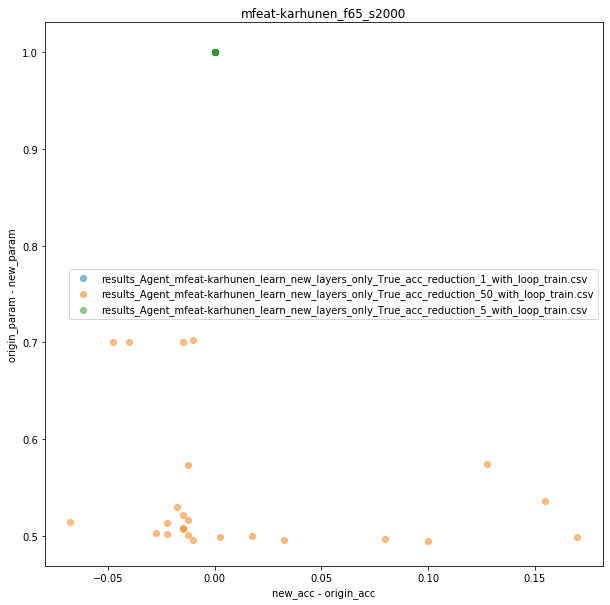

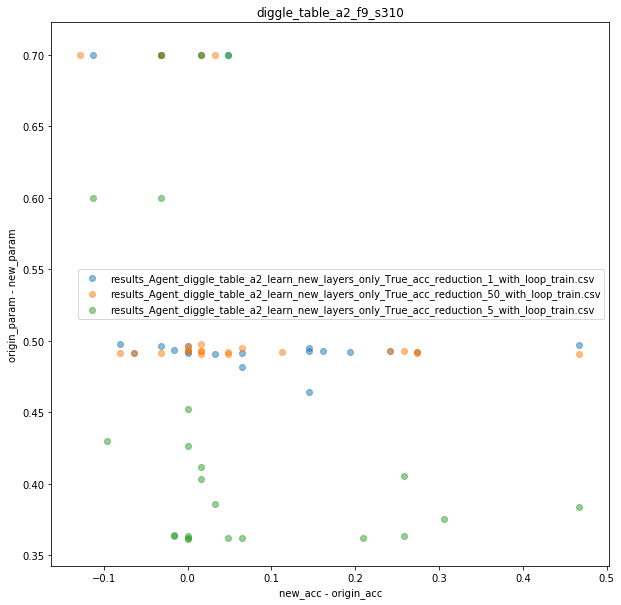

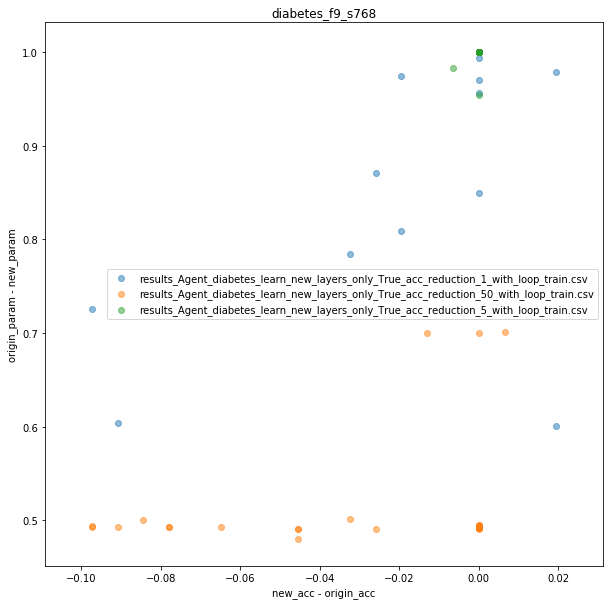

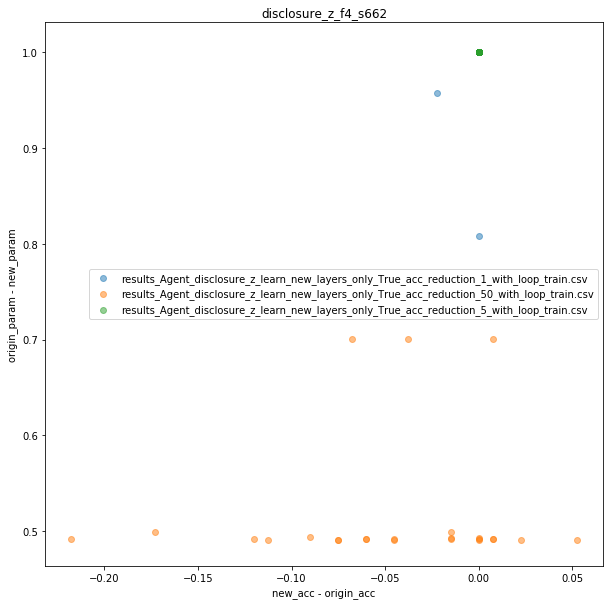

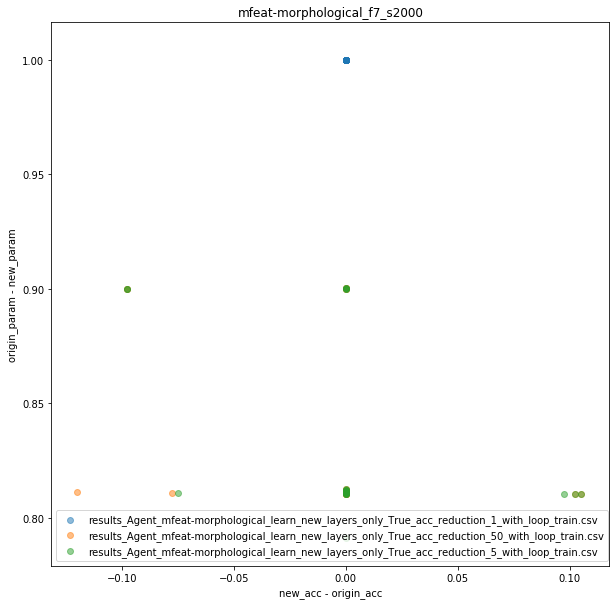

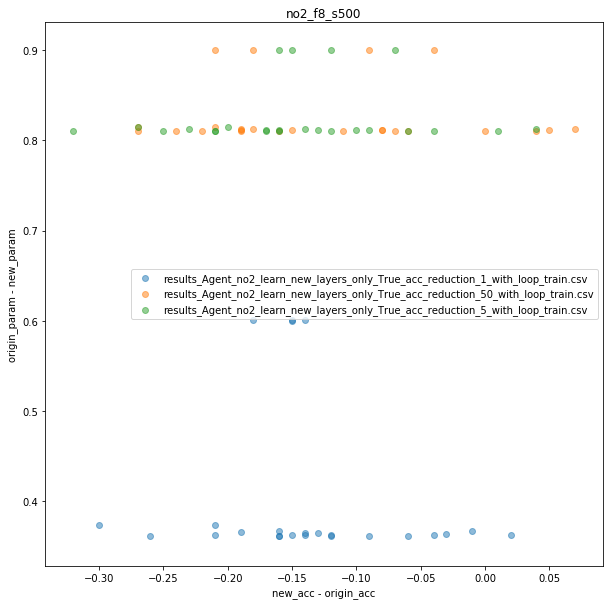

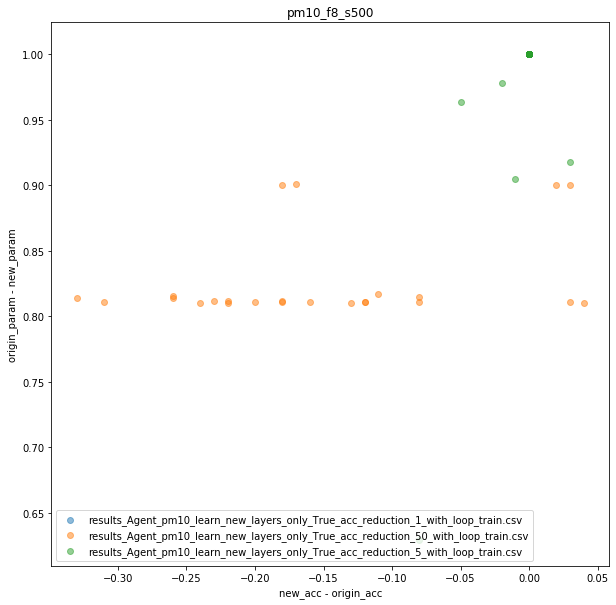

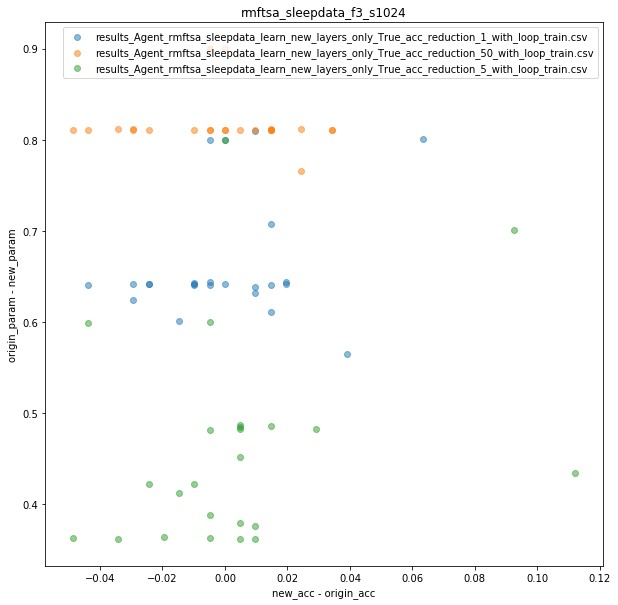

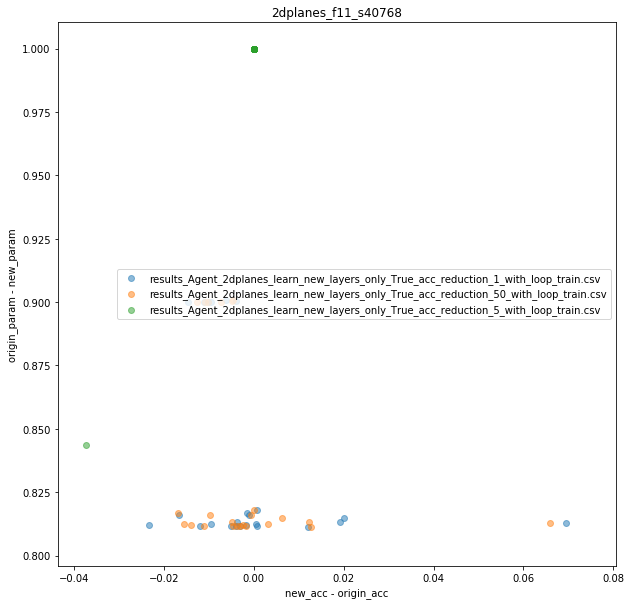

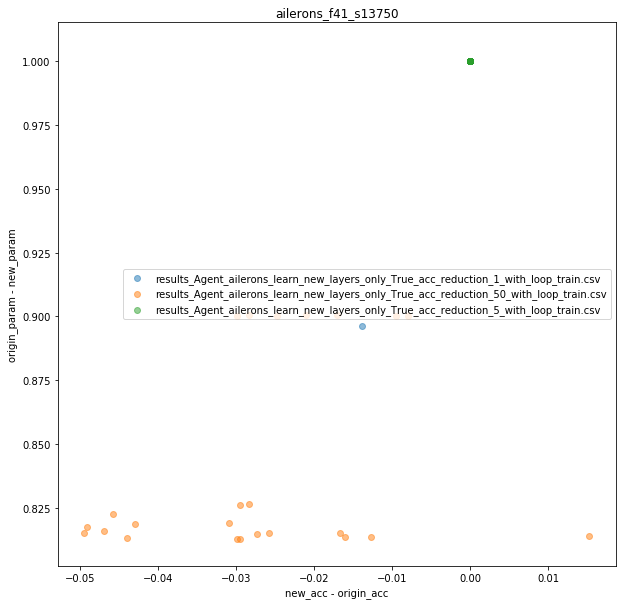

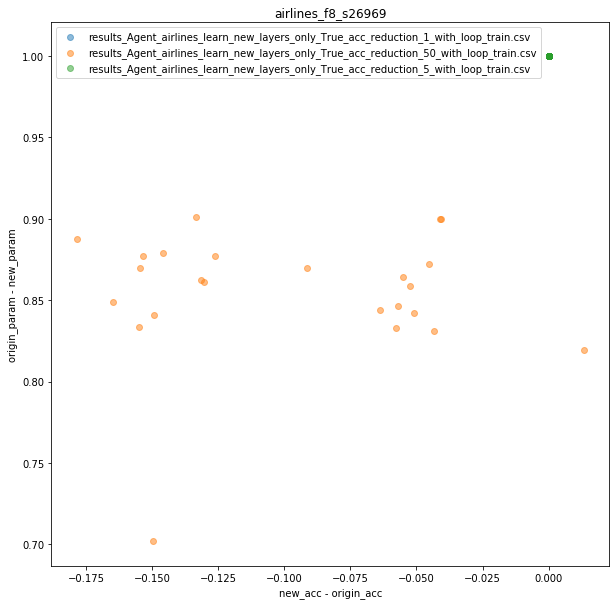

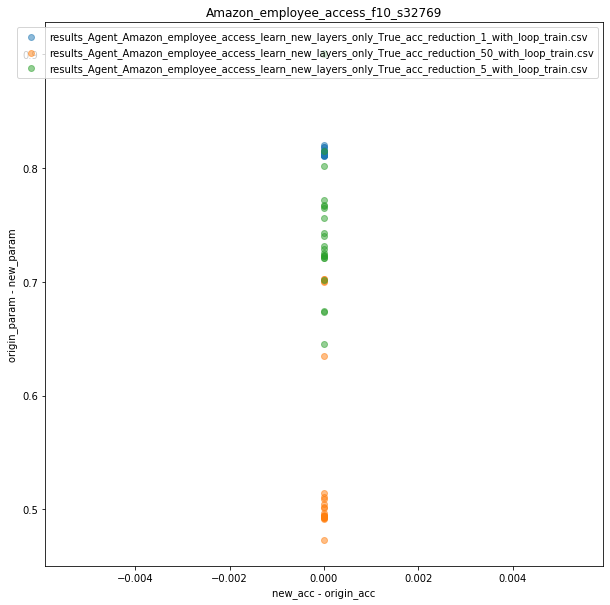

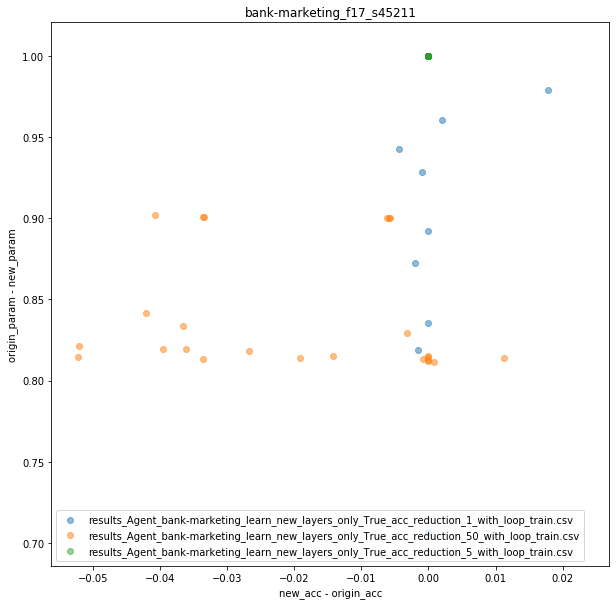

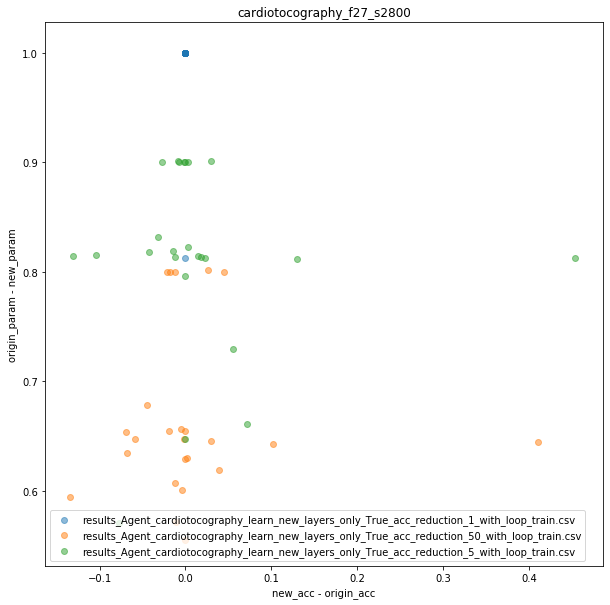

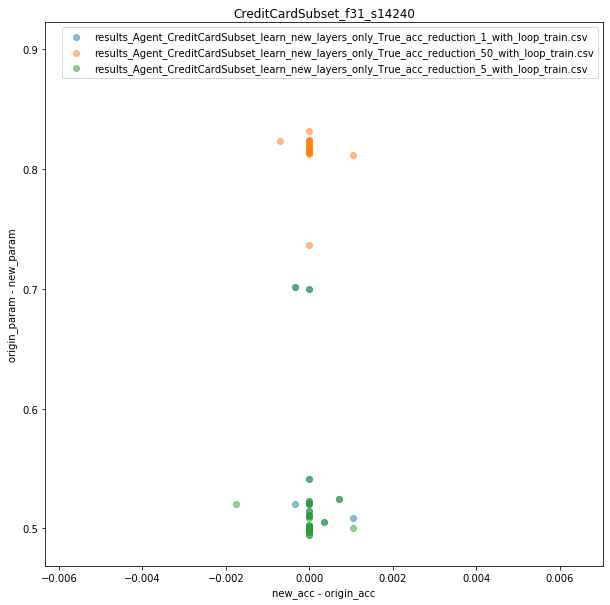

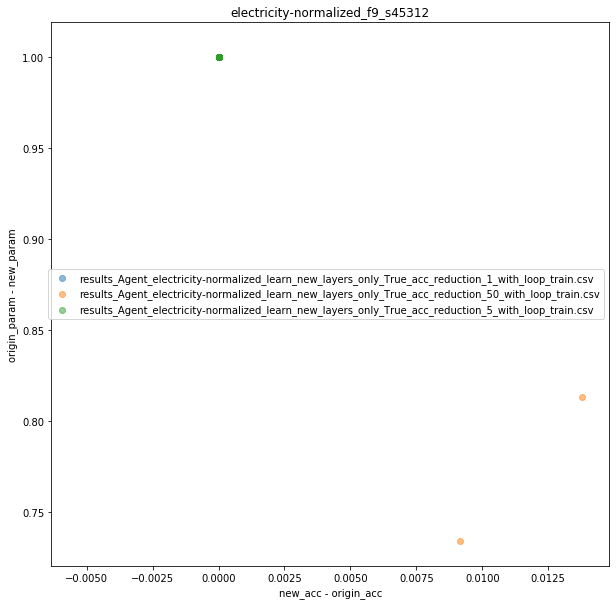

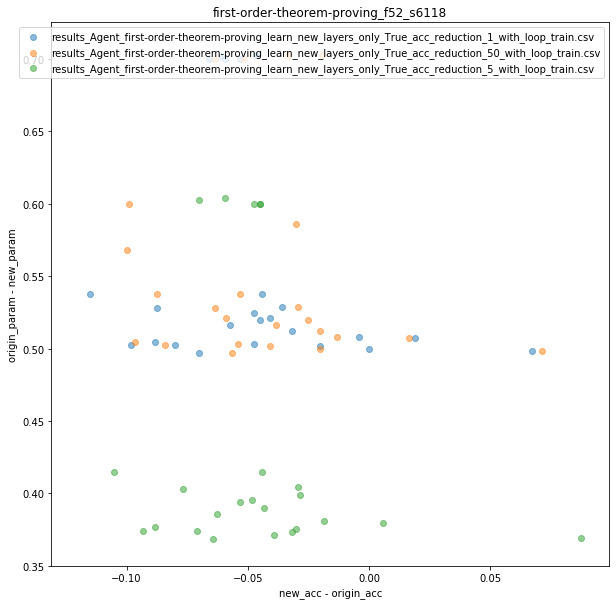

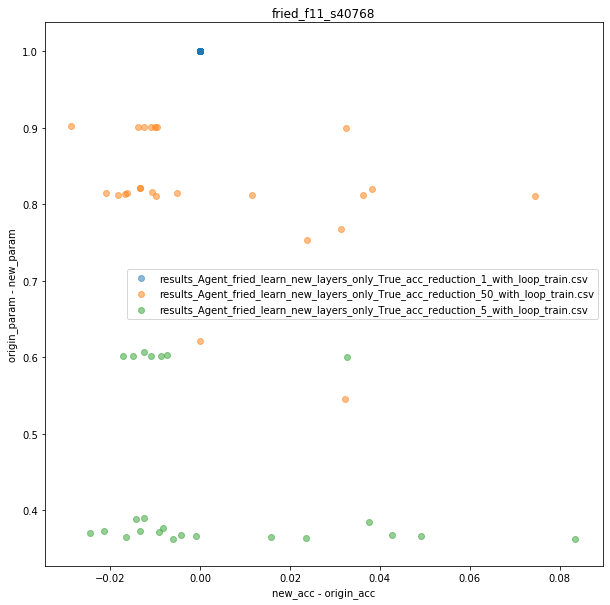

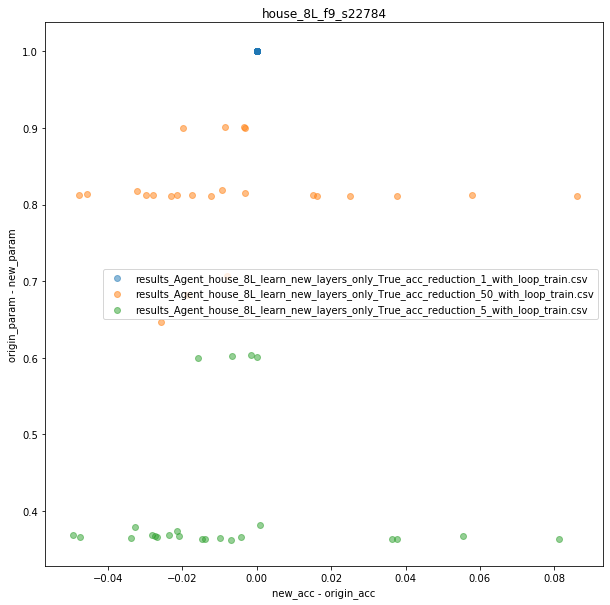

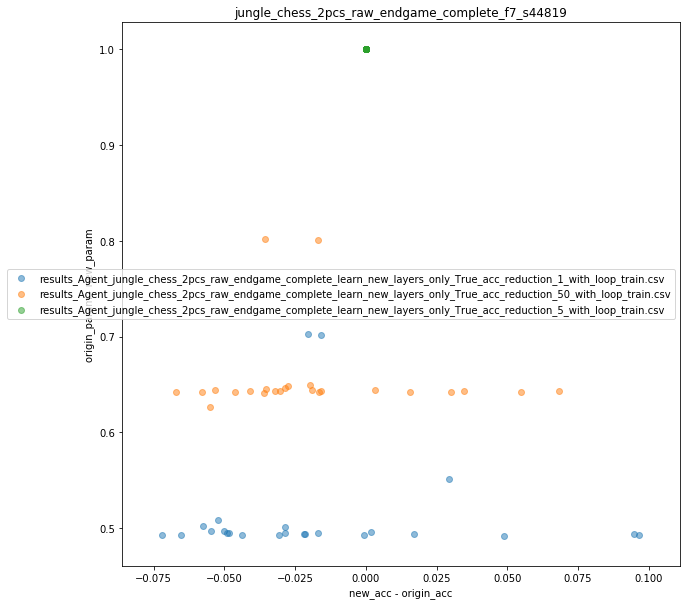

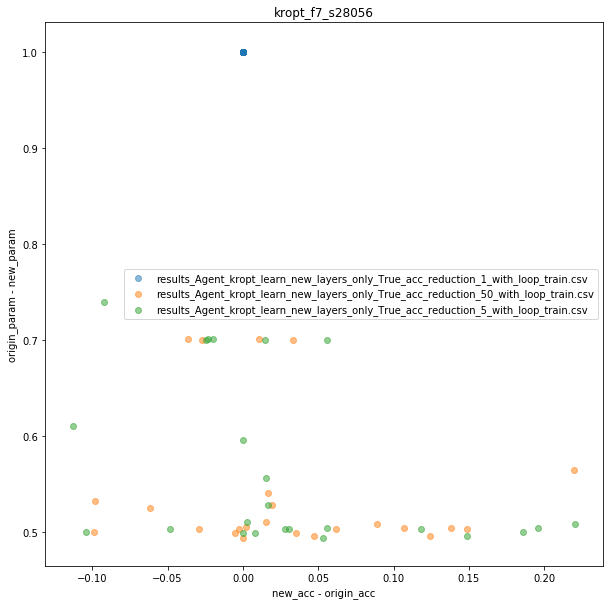

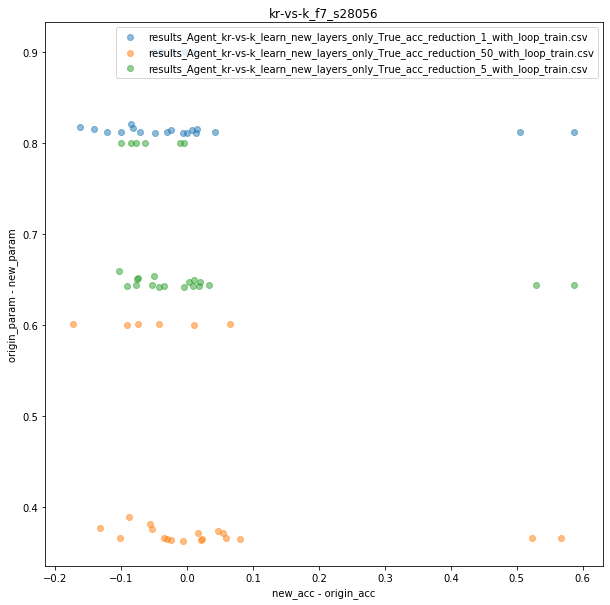

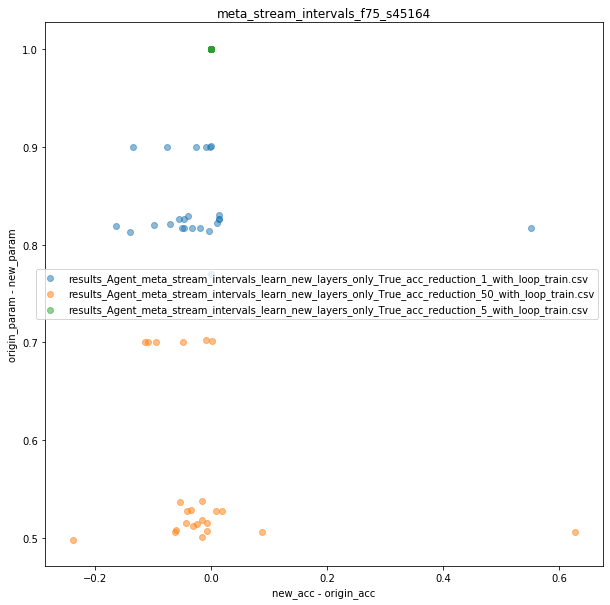

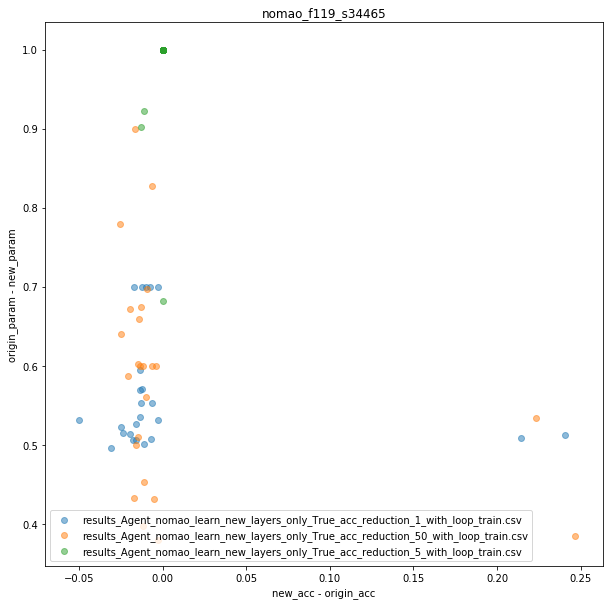

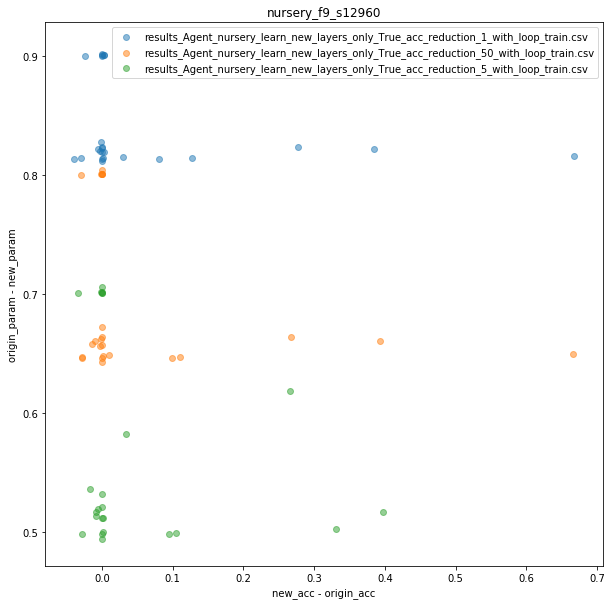

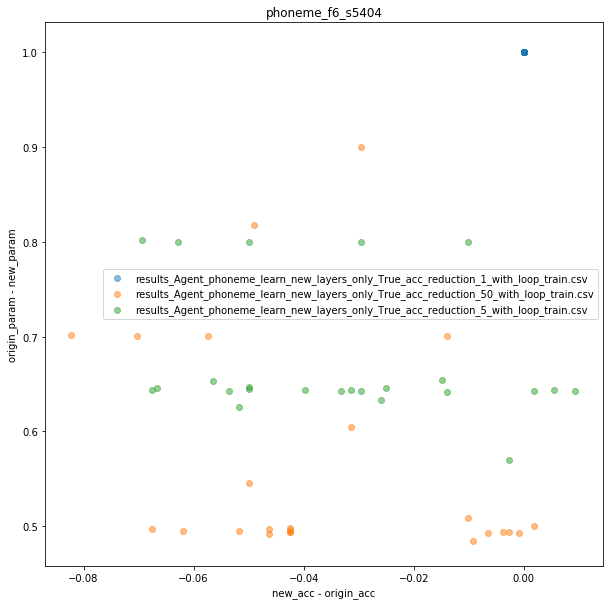

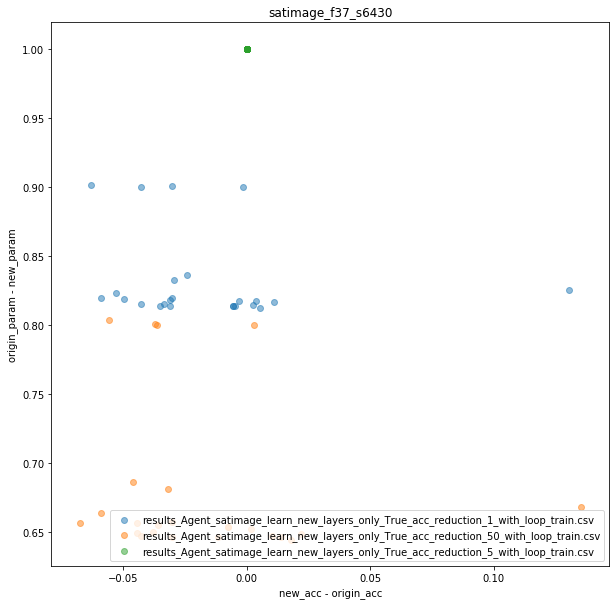

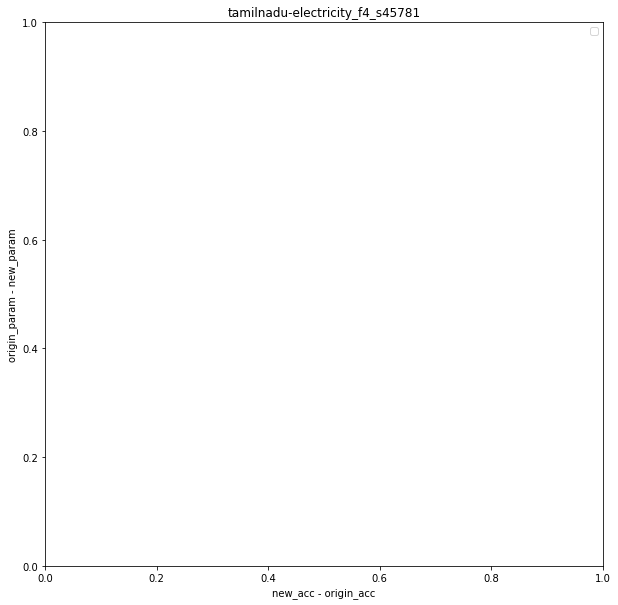

In [18]:
plot_results_by_cv("train")

Current CV -> test
---------------------------------------------------



/home/liorhi/.conda/envs/liorhi_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
No handles with labels found to put in legend.


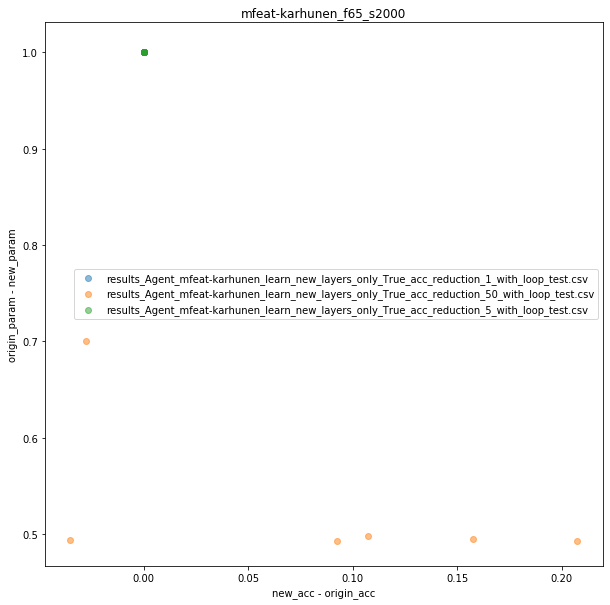

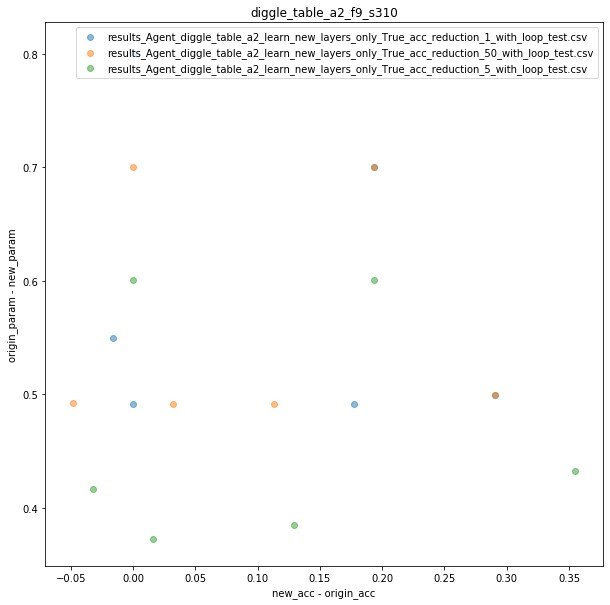

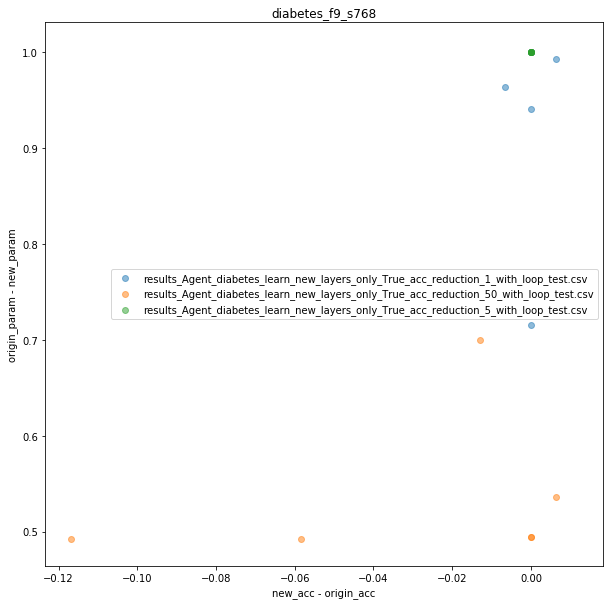

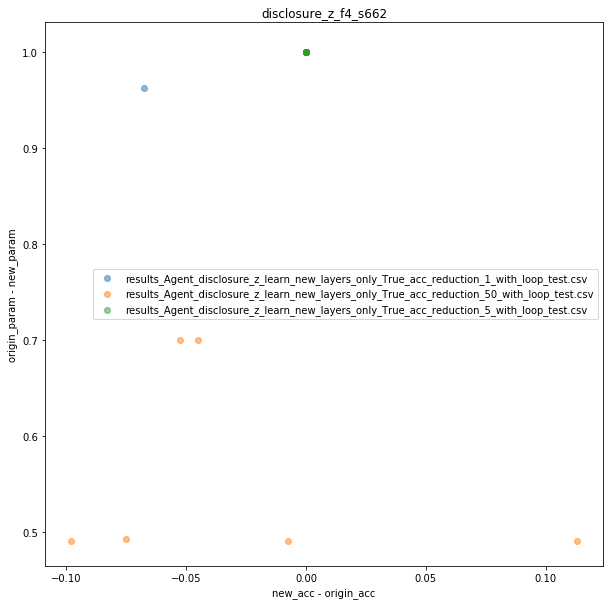

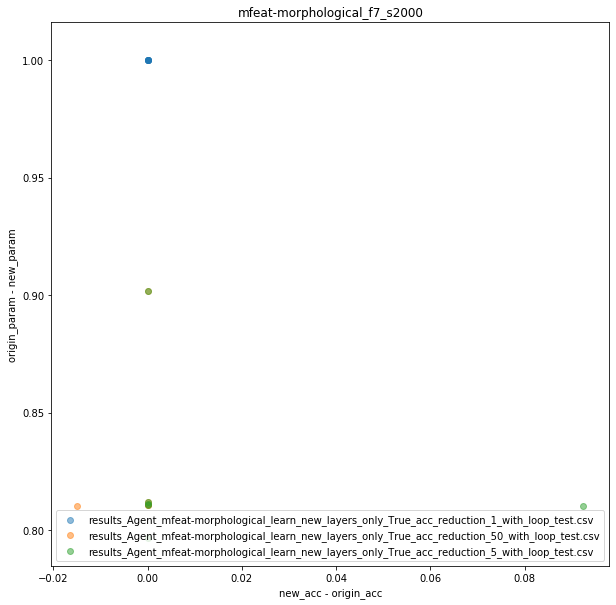

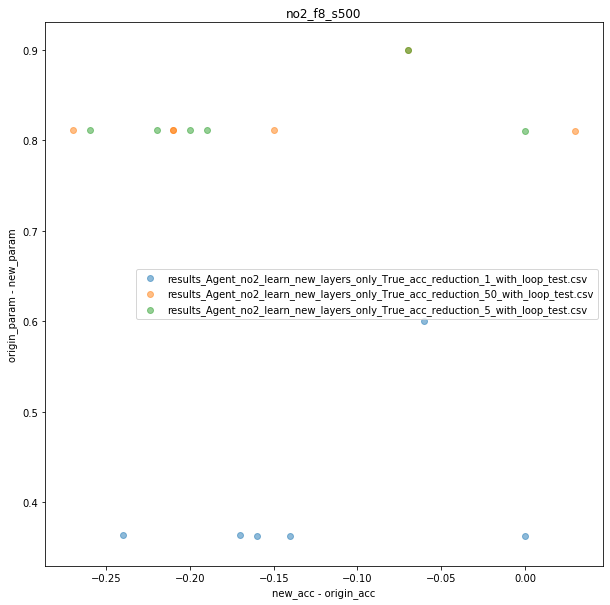

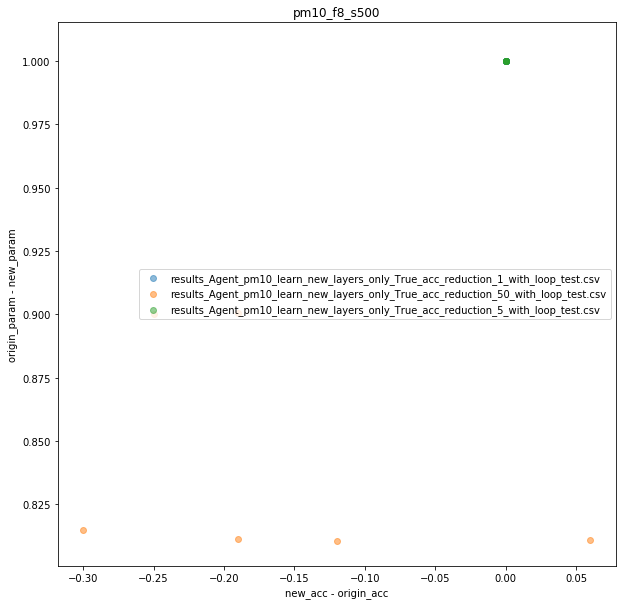

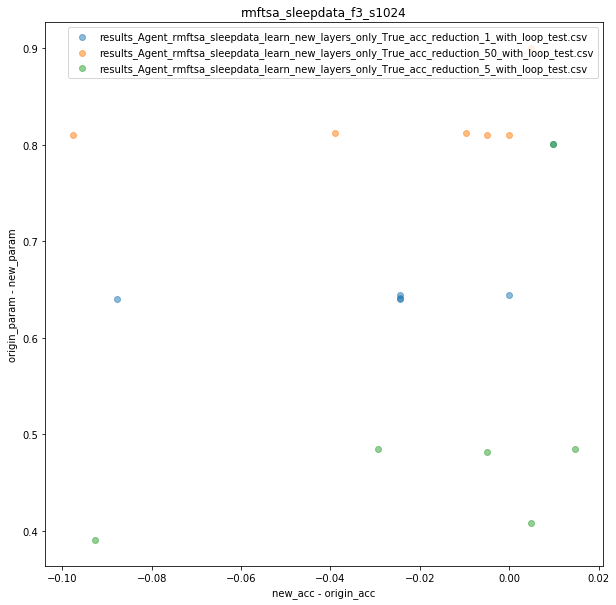

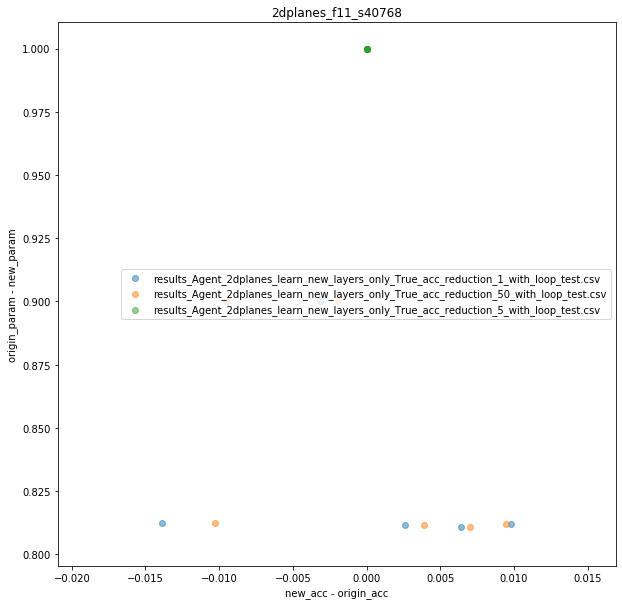

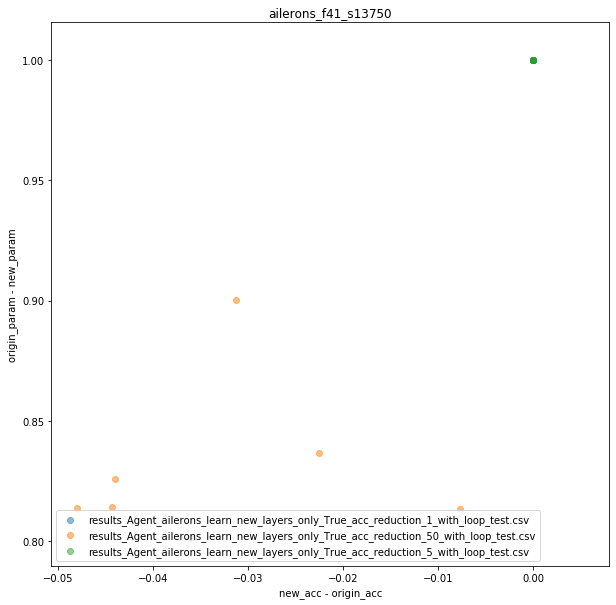

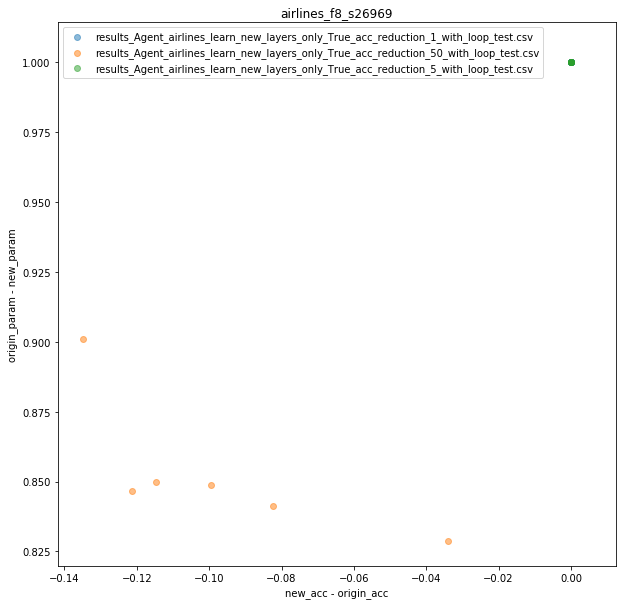

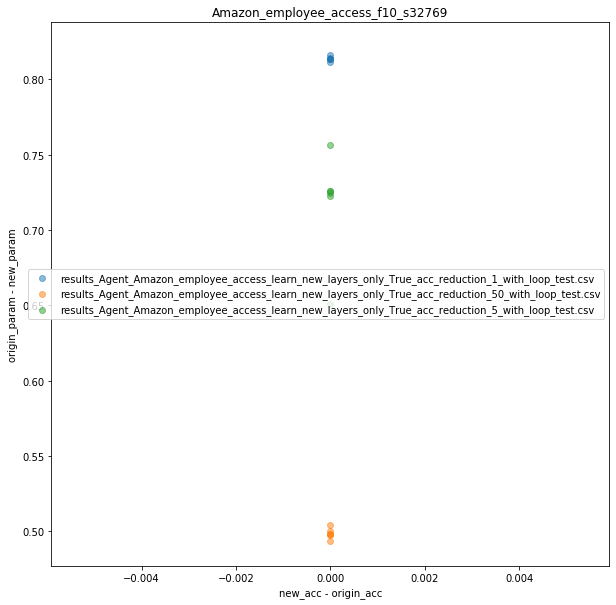

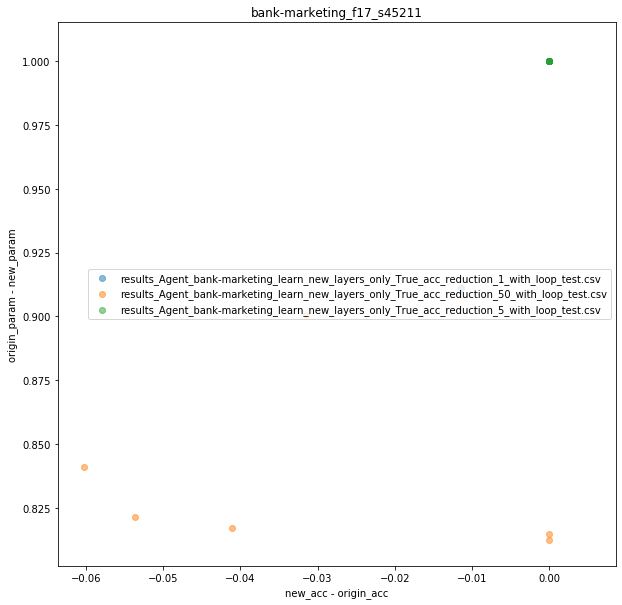

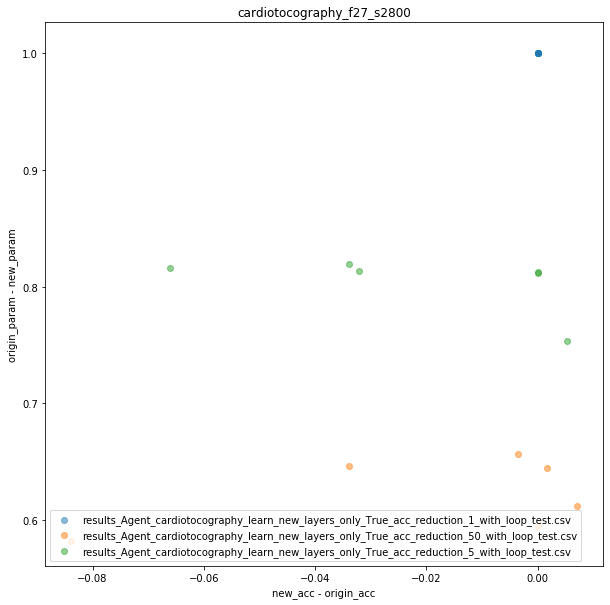

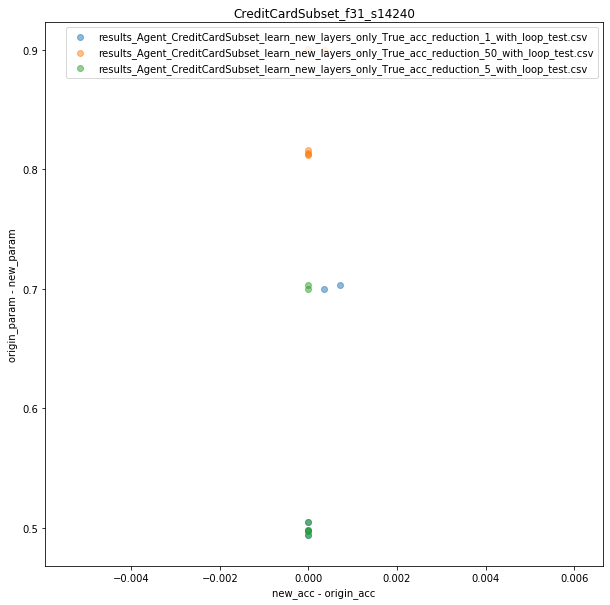

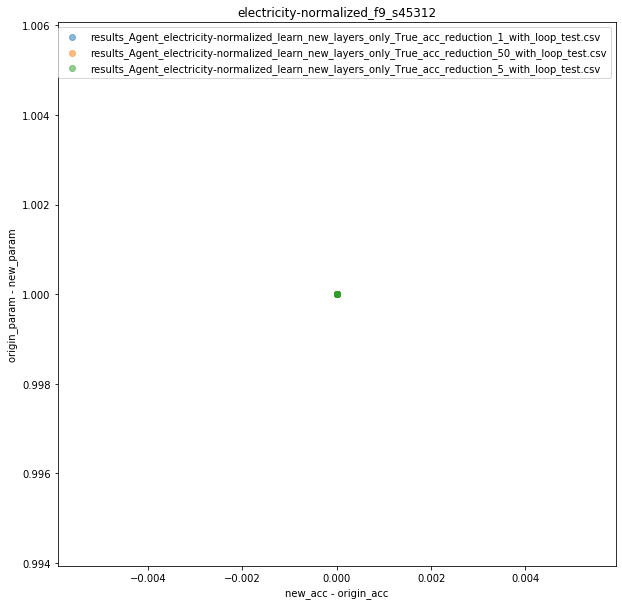

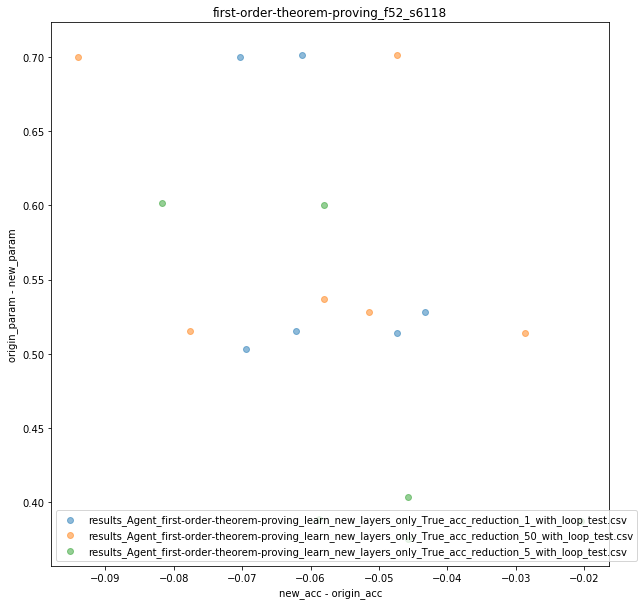

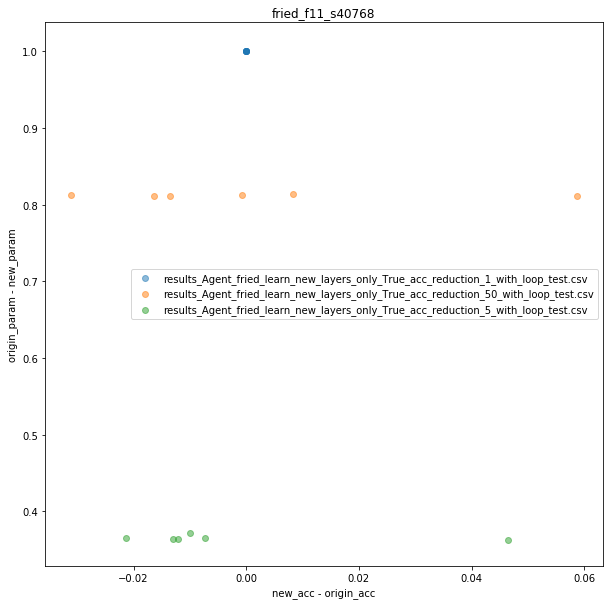

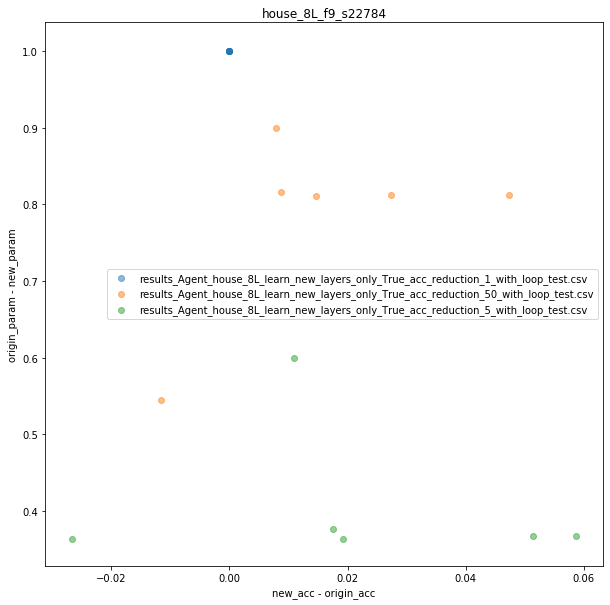

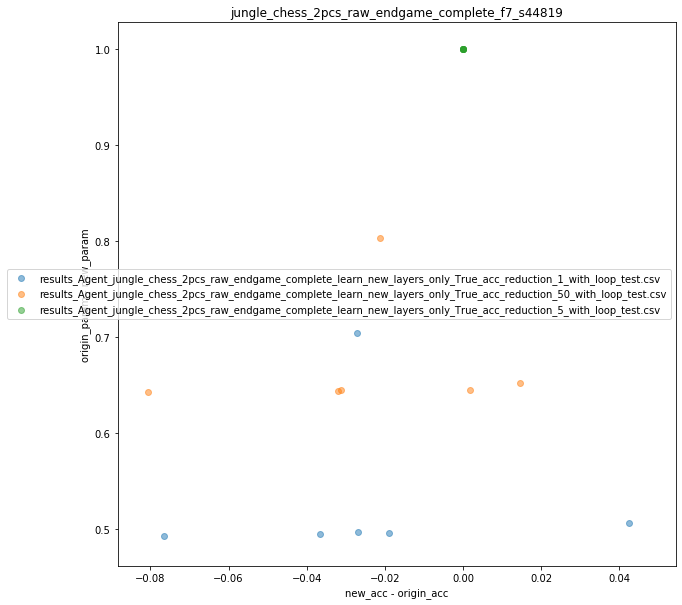

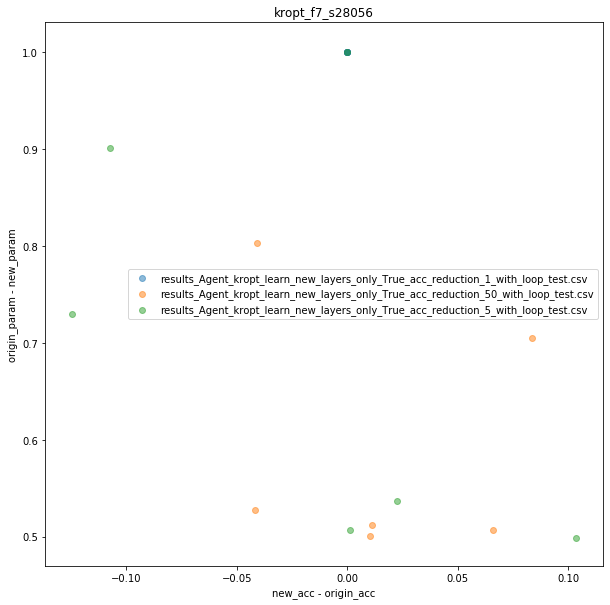

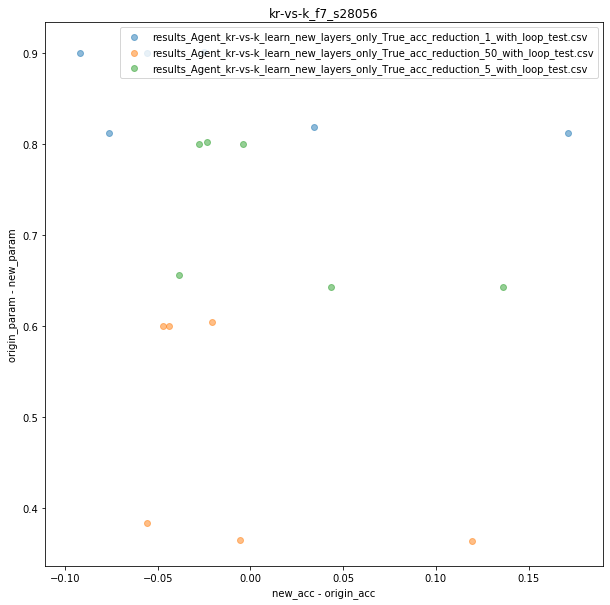

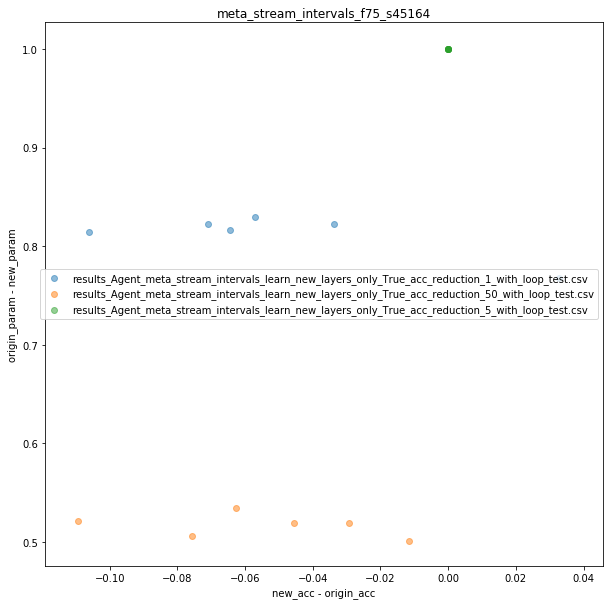

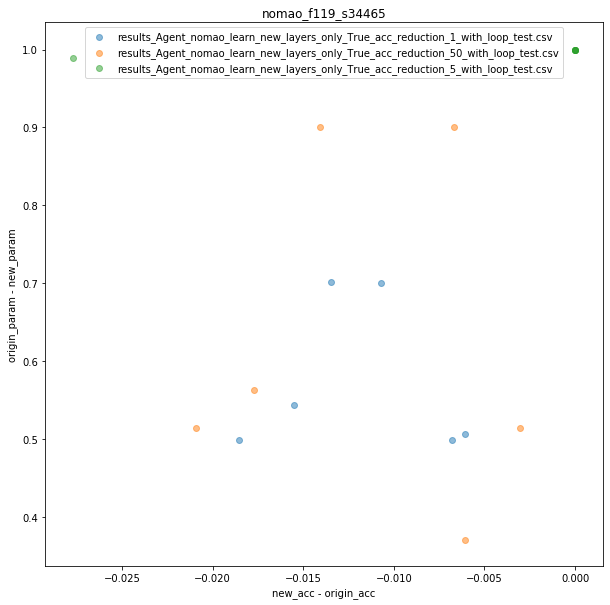

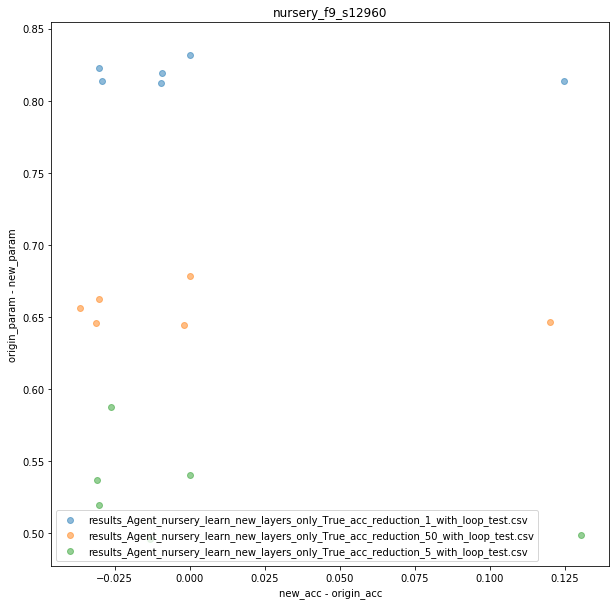

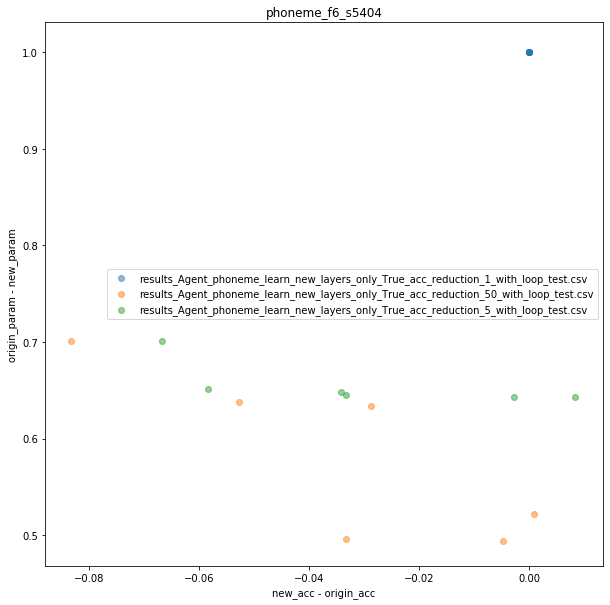

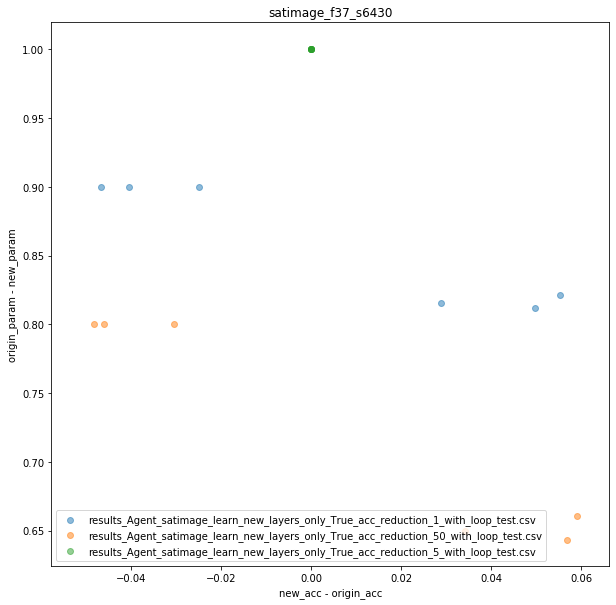

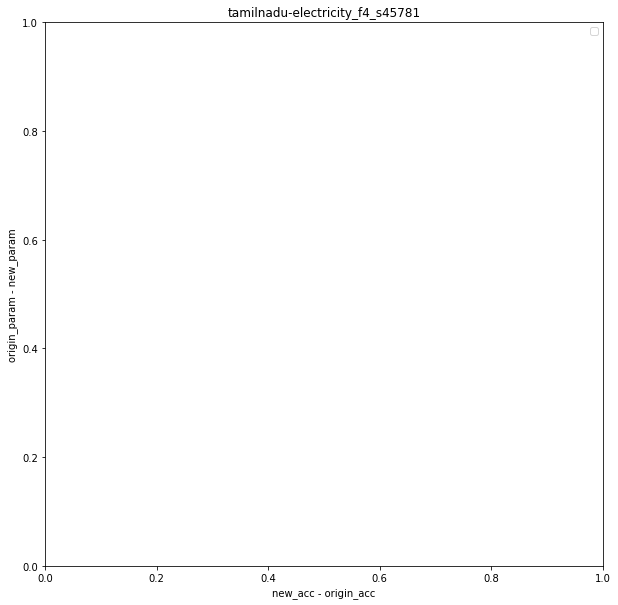

In [19]:
plot_results_by_cv('test')

In [ ]:
import pprint
names = []
def show_sum_acc(filter_func, title = ''):
    accs = []
    filtered = filter(filter_func, relevant_results)
    for r, name in filtered:
        names.append(name)
        accs.append(r.delta_acc.mean())
        
    id_to_name = dict(zip(names, range(len(names))))
    pp = pprint.PrettyPrinter()
    pp.pprint(id_to_name)
    ids = list(map(str,map(id_to_name.get, names)))
    plt.title(title)
    plt.bar(ids, accs)
    plt.xlabel("Result Name")
    plt.ylabel("delta Acc")
    plt.show()

In [ ]:
for d in datasets:
    print(f"Dataset => {d}")
    for curr_cv in cv:
        show_sum_acc(lambda x : curr_cv in x[1] and d in x[1] in x[1], 
                     title = f'delta accuracy for {d} dataset, {curr_cv}')
    print("==========================================")

In [ ]:
import pprint

def show_sum_param(filter_func, title = ''):
    accs = []
    names = []

    filtered = filter(filter_func, relevant_results)
    for r, name in filtered:
        names.append(name)
        accs.append(r.delta_param.mean())
        
    id_to_name = dict(zip(names, range(len(names))))
    pp = pprint.PrettyPrinter()
    pp.pprint(id_to_name)
    ids = list(map(str,map(id_to_name.get, names)))
    plt.title(title)
    plt.bar(ids, accs)
    plt.xlabel("Result Name")
    plt.ylabel("delta param")
    plt.show()

In [ ]:
for d in datasets:
    print(f"Dataset => {d}")
    for curr_cv in cv:
        show_sum_param(lambda x : curr_cv in x[1] and d in x[1] in x[1], 
                     title = f'delta param for {d} dataset, {curr_cv}')
    print("==========================================")

In [ ]:
for curr_dataset in datasets:
    print(f"Dataset - {curr_dataset}")
    for curr_cv in cv:
        print(f"CV - {curr_cv}")
# curr_dataset = datasets[0]
# curr_cv = 'train'
        curr_cv_datasets = list(filter(lambda x : curr_cv in x[1] and curr_dataset in x[1], relevant_results))
        number_of_models = curr_cv_datasets[0][0].shape[0]
        agents = list(map(lambda x: x[1], curr_cv_datasets))
        id_to_name = dict(zip(names, range(len(agents))))
        pp = pprint.PrettyPrinter()
        pp.pprint(id_to_name)
        ids = list(map(str,map(id_to_name.get, agents)))

        for curr_model_idx in range(number_of_models):
            print("Origin model architecture => ", curr_cv_datasets[0][0].iloc[curr_model_idx].origin_model_arch)

            all_relevant_rows = list(map(lambda x: x[0].iloc[curr_model_idx].delta_acc, curr_cv_datasets))
            title = f'all models delta accuracies {curr_dataset} dataset {curr_cv}'

            plt.bar(ids, all_relevant_rows)
            plt.xlabel("agent id")
            plt.ylabel("delta accuracy")
            plt.title(title)
            plt.show()

In [ ]:
for curr_dataset in datasets:
    print(f"Dataset - {curr_dataset}")
    for curr_cv in cv:
        print(f"CV - {curr_cv}")
# curr_dataset = datasets[0]
# curr_cv = 'train'
        curr_cv_datasets = list(filter(lambda x : curr_cv in x[1] and curr_dataset in x[1], relevant_results))
        number_of_models = curr_cv_datasets[0][0].shape[0]
        agents = list(map(lambda x:x[1], curr_cv_datasets))
        id_to_name = dict(zip(names, range(len(agents))))
        pp = pprint.PrettyPrinter()
        pp.pprint(id_to_name)
        ids = list(map(str,map(id_to_name.get, agents)))

        for curr_model_idx in range(number_of_models):
            print("Origin model architecture => ", curr_cv_datasets[0][0].iloc[curr_model_idx].origin_model_arch)

            all_relevant_rows = list(map(lambda x: x[0].iloc[curr_model_idx].delta_param, curr_cv_datasets))
            title = f'all models delta param {curr_dataset} dataset {curr_cv}'

            plt.bar(ids, all_relevant_rows)
            plt.xlabel("agent id")
            plt.ylabel("delta param")
            plt.title(title)
            plt.show()